<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 3. Roots
## Newton-Raphson method
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we apply the **Newton-Raphson method** to find roots of the function $f(x)$ with one variable $x$,
defined over the interval $[a,b]$. We base our search on the bracketing algorithm introduced before ...

We first import some libraries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function
Next, we define the function, which we would like to examine.
This time, we also need the **first derivative**.

In [2]:
def root_f(x):
    root_f = np.sin(x)
    return root_f

def root_df(x):
    root_df = np.cos(x)
    return root_df

## Bracketing algorithm
As we have introduced the **bracketing algorithm** before, we simply run it for the defined function and interval.

In [3]:
def root_bracket (f,a,b,n):
    '''
    #-----------------------------------------------------------------------
    # Given a function fx defined on the intervall [a,b], subdivide the
    # intervall in n equally spaced segments, and search for zero crossings
    # of the function. nb is input as the maximum number of roots searched,
    # it is reset to the number of bracketing pairs found, xb1(1:nb),xb2(1:nb).
    # (c) Numerical recipes 
    #-----------------------------------------------------------------------
    '''
    nb  = 0
    xb1 = np.zeros([0])
    xb2 = np.zeros([0])
    x   = a
    dx  = (b-a)/n
    fa  = f(x)
    for i in np.linspace(1,n,n,dtype=int):
        x = x + dx
        fb = f(x)
        if (fa*fb <= 0):
            nb = nb + 1
            xb1 = np.append(xb1,x-dx)
            xb2 = np.append(xb2,x)
        fa = fb
    return xb1,xb2,nb 

In [5]:
#-----------------------------------------------------------------------
# define interval and number of segments
#-----------------------------------------------------------------------
a   = -0.1
b   = 2.1*np.pi
n   = 10
nb  = 0
#-----------------------------------------------------------------------
# call bracketing algorithm
#-----------------------------------------------------------------------
[xb1,xb2,nb] = root_bracket(root_f,a,b,n)

[-0.1         2.57893783  5.92761012] [0.56973446 3.24867229 6.59734457] 3


## Newton-Raphson method
Next, we define the **Newton-Raphson method** as a function.
1. ...

In [6]:
def root_newton (f,df,a,tol):
    '''
    #-----------------------------------------------------------------------
    # Given a function fx defined on the interval [a,b], which contains
    # a possible root (bracketing!), the root is found the Newton method.
    # Input:
    # a           - initial gues of root
    # f,df        - function and its first derivative
    # acc         - desired tolerance 
    #Output:
    # root_newton - root
    # interval, until the desired accuracy +/-acc is achieved, otherwise
    # the algorithm quits.
    # (c) modified from Numerical recipes 
    #-----------------------------------------------------------------------
    '''
    nmax = 20
    root_newton = a
    for i in np.arange(1,nmax):
        root_newton   = root_newton - f(root_newton) / df(root_newton)
        fa = f(root_newton)
       #print (i,a,0.e0,0.e0,root_newton,fa)
        if (np.abs(fa) <= tol):
            return root_newton
    exit ('root_newton: too many iterations in root_newton')

## Test the algorithm
Next, we test our **Newton-Raphson method** with the function $f(x)=\sin(x)$, given in the interval $[0,2\pi]$,
by looping over the bracketed intervals:

In [10]:
x0 = np.empty(nb)
y0 = np.empty(nb)
for i in range(nb):
    x0[i] = root_newton(root_f,root_df,(xb1[i]+xb2[i])/2,tol=0.0001)
    y0[i] = root_f(x0[i])
    print ("%5i %10.5f %10.5f" % (i,x0[i],y0[i]))

    0    0.00000    0.00000
    1    3.14159    0.00000
    2    6.28319    0.00000


Plot the function and the intervals with sign change found:

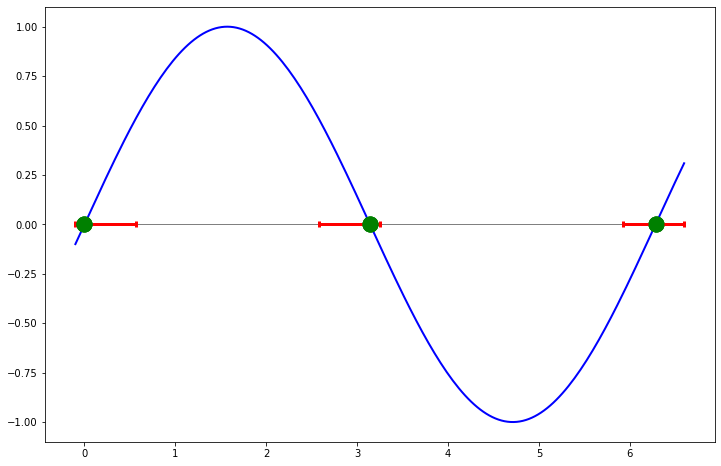

In [11]:
x=np.linspace(a,b,201)
y=root_f(x)

plt.figure(figsize=(12,8))
plt.plot([a,b],[0,0],linewidth=1,color='gray')
plt.plot(x,y,linewidth=2,color='blue')
for i in range(nb):
    plt.plot([xb1[i],xb2[i]],[0,0],linewidth=3,color='red')
    plt.plot(xb1[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(xb2[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(x0,y0,marker='o',linewidth=0,markersize=15,color='green')


## Use with polynomial function ...

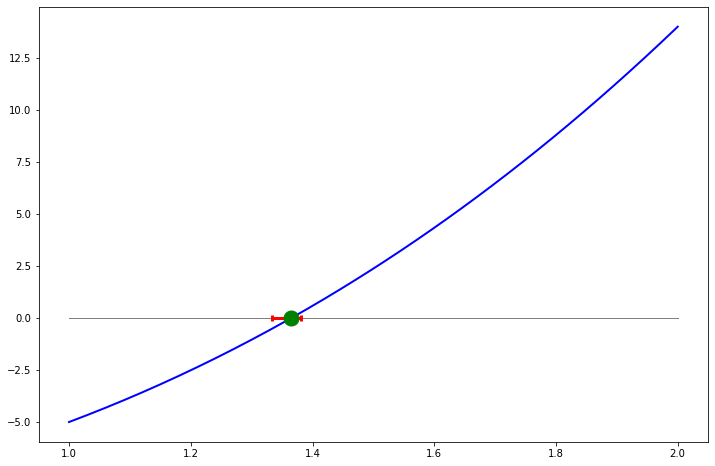

In [12]:
# define function
def root_f(x):
    y = x**3 + 4*x**2 - 10
    return y

def root_df(x):
    y = 3*x**2 + 8*x
    return y

# define interval and sub-division
a   = 1.
b   = 2.
n   = 21
nb  = 0

# find possible intervals
[xb1,xb2,nb] = root_bracket(root_f,a,b,n)

# run secant method
x0 = np.empty(nb)
y0 = np.empty(nb)
for i in range(nb):
    x0[i] = root_newton(root_f,root_df,(xb1[i]+xb2[i])/2,tol=0.0005)
    y0[i] = root_f(x0[i])

# plot
x=np.linspace(a,b,201)
y=root_f(x)
plt.figure(figsize=(12,8))
#plt.ylim([-2,2])
plt.plot([a,b],[0,0],linewidth=1,color='gray')
plt.plot(x,y,linewidth=2,color='blue')
for i in range(len(xb1)):
    plt.plot([xb1[i],xb2[i]],[0,0],linewidth=3,color='red')
    plt.plot(xb1[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(xb2[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(x0,y0,marker='o',linewidth=0,markersize=15,color='green')

----
[next >](Numerics_lab03_multiple.ipynb)